<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/recurrentgemma_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U transformers peft accelerate optimum
!pip install --quiet bitsandbytes
!pip install --upgrade git+https://github.com/huggingface/transformers.git accelerate

In [2]:
from transformers import GemmaTokenizer, AutoModelForCausalLM

tokenizer = GemmaTokenizer.from_pretrained(
    "google/recurrentgemma-2b-it"
)
model = AutoModelForCausalLM.from_pretrained(
    "google/recurrentgemma-2b-it",
    device_map="auto",
    torch_dtype="auto",
)


tokenizer_config.json:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/399M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of RecurrentGemmaForCausalLM were not initialized from the model checkpoint at google/recurrentgemma-2b-it and are newly initialized: ['model.normalizer']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [3]:

chat = [
    { "role": "user", "content": " 유희왕에서 가장 강력한 카드가 무엇인지 알고 있습니까?" },
]

prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs,
                         max_new_tokens=128,
                         do_sample=True,
                         top_p=0.95,
                         temperature=0.7,
                         repetition_penalty=1.1,
                         )

print(tokenizer.decode(outputs[0]))

<bos><bos><start_of_turn>user
유희왕에서 가장 강력한 카드가 무엇인지 알고 있습니까?<end_of_turn>
<start_of_turn>model
유희왕에서 가장 강력한 카드는 **"거울"**입니다. 거울은 유희왕 시리즈의 핵심 카드 중 하나이며, 이 카드를 사용하면 Opponent의 마법과 기타 카드를 격파하거나 자신의 카드를 강화할 수 있습니다. 또한, 거울은 Opponent의 카드를 격파하면 자신에게 10점을 주며, 자신의 카드를 격파하면 Opponent에게 10점을 줍니다. 거울은 궁극적인 슈팅 카드로, 유희왕 시리즈


In [4]:
chat = [
    { "role": "user", "content": "Do you know what the most powerful card in Yu-Gi-Oh is?" },
]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

input_ids = tokenizer(prompt, return_tensors="pt").to(model.device)

outputs = model.generate(
    **input_ids,
    max_new_tokens=128,
    do_sample=True,
    top_p=0.95,
    temperature=0.7,
    repetition_penalty=1.1,
)

print(tokenizer.decode(outputs[0]))

<bos><bos><start_of_turn>user
Do you know what the most powerful card in Yu-Gi-Oh is?<end_of_turn>
<start_of_turn>model
The most powerful card in Yu-Gi-Oh is the "Synchro Summons" card. These cards allow players to combine multiple monsters to create powerful Synchro monsters. The most powerful Synchro Monster is "Synchro Shell Dullahan", which can be created from three Level 5 monsters.<eos>


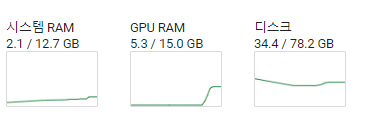